# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

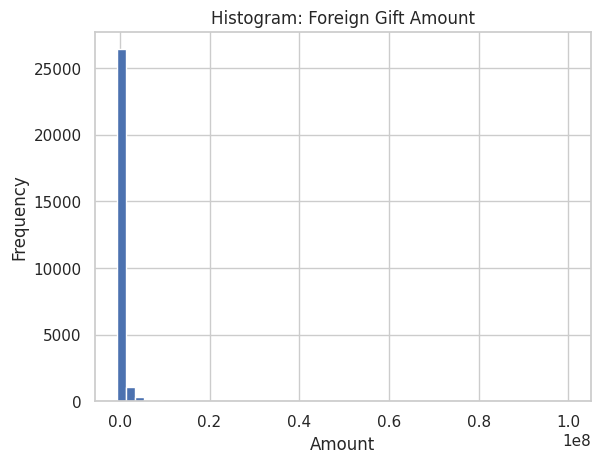

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


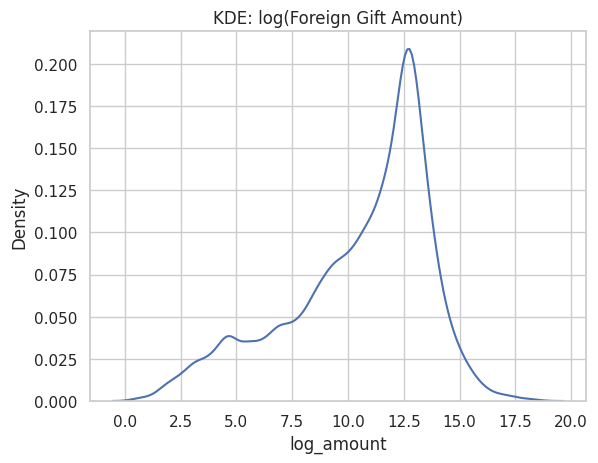

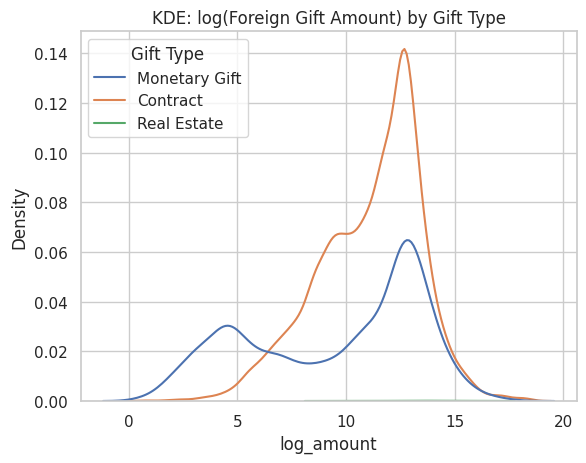

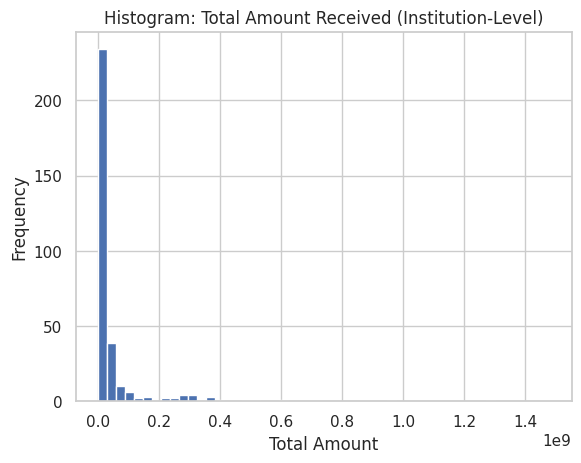

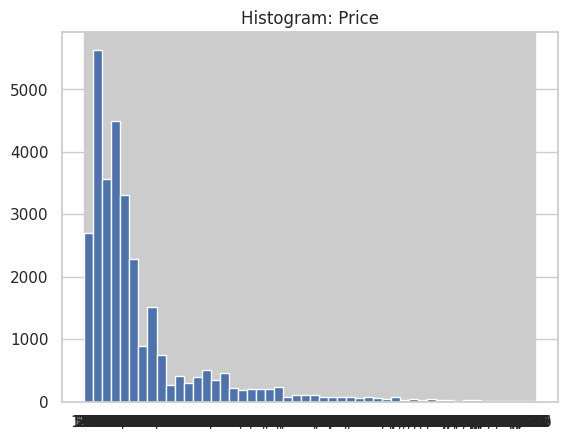

TypeError: data type 'numerical' not understood

<Figure size 640x480 with 0 Axes>

In [10]:
###############################################
# Assignment: Exploratory Data Analysis (Full)
###############################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

############################################################
# Q1. Sample statistics identities and transformations
############################################################

# Demonstrations using symbolic / numeric verification
x = np.random.randn(1000)
y = np.random.randn(1000)

# Show that mean(x - mean(x)) = 0
mean_centered = np.mean(x - np.mean(x))

# Show that Var(x) = mean(x^2) - (mean(x))^2
var_identity = np.mean(x**2) - (np.mean(x))**2
var_np = np.var(x, ddof=0)

# Show that Cov(x,y) = mean(xy) - mean(x)mean(y)
cov_identity = np.mean(x*y) - np.mean(x)*np.mean(y)
cov_np = np.cov(x, y, ddof=0)[0, 1]

# Median transformation counterexample
data = np.array([1, 2, 100])
g = np.square  # monotone increasing on R+
median_of_transformed = np.median(g(data))
transformed_of_median = g(np.median(data))

############################################################
# Q2. Foreign Gifts Data
############################################################

fg = pd.read_csv("/ForeignGifts_edu.csv")

# Histogram Foreign Gift Amount
plt.figure()
fg["Foreign Gift Amount"].hist(bins=50)
plt.title("Histogram: Foreign Gift Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Gift Type value counts
gift_counts = fg["Gift Type"].value_counts(normalize=True)

# KDE of log amounts
fg["log_amount"] = np.log(fg["Foreign Gift Amount"] + 1)

plt.figure()
sns.kdeplot(fg["log_amount"])
plt.title("KDE: log(Foreign Gift Amount)")
plt.show()

plt.figure()
sns.kdeplot(data=fg, x="log_amount", hue="Gift Type")
plt.title("KDE: log(Foreign Gift Amount) by Gift Type")
plt.show()

# Top 15 countries by number of gifts
top15_count = (
    fg.groupby("Country of Giftor")["Foreign Gift Amount"]
    .count()
    .sort_values(ascending=False)
    .head(15)
)

# Top 15 countries by total amount
top15_amount = (
    fg.groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

# Top 15 institutions by total amount received
inst_amounts = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
)
top15_inst = inst_amounts.head(15)

plt.figure()
inst_amounts.hist(bins=50)
plt.title("Histogram: Total Amount Received (Institution-Level)")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

# Which giftors give the most money?
top_giftors = (
    fg.groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

############################################################
# Q3. Airbnb Data
############################################################

air = pd.read_csv("/airbnb_hw.csv")

# Dimensions and variables
air_shape = air.shape
air_head = air.head()

# Cross-tabulate Room Type vs Property Type
cross_tab = pd.crosstab(air["Room Type"], air["Property Type"])

# Price distribution
plt.figure()
air["Price"].hist(bins=50)
plt.title("Histogram: Price")
plt.show()

plt.figure()
sns.kdeplot(air["Price"].astype("numerical"))
plt.title("KDE: Price")
plt.show()

plt.figure()
sns.boxplot(x=air["Price"])
plt.title("Boxplot: Price")
plt.show()

desc_price = air["Price"].describe()

# Log transform price
air["price_log"] = np.log(air["Price"] + 1)

plt.figure()
air["price_log"].hist(bins=50)
plt.title("Histogram: log(Price)")
plt.show()

plt.figure()
sns.kdeplot(air["price_log"])
plt.title("KDE: log(Price)")
plt.show()

plt.figure()
sns.boxplot(x=air["price_log"])
plt.title("Boxplot: log(Price)")
plt.show()

desc_price_log = air["price_log"].describe()

# Scatter price_log vs beds
plt.figure()
sns.scatterplot(x="Beds", y="price_log", data=air, alpha=0.5)
plt.title("Scatter: price_log vs beds")
plt.show()

# Group by beds
group_beds = air.groupby("Beds")["Price"].agg(["mean", "std", "median", "count"])

# Scatter with color by room_type and property_type
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Beds",
    y="price_log",
    hue="Room Type",
    style="Property Type",
    data=air,
    alpha=0.5
)
plt.title("Scatter: price_log vs beds (Colored by Room/Property)")
plt.show()

# Group by room and property type
group_room_prop = air.groupby(["Room Type", "Property Type"])["Price"].agg(["mean","std","median","count"])

# Jointplot (hex)
sns.jointplot(
    data=air,
    x="Beds",
    y="price_log",
    kind="hex"
)

############################################################
# Q4. Drilling Rigs
############################################################

dr = pd.read_csv("/drilling_rigs.csv")

# Check structure
dr_shape = dr.shape
dr_info = dr.dtypes

# Clean: enforce numeric
for col in dr.columns:
    if col not in ["Month"]:
        dr[col] = pd.to_numeric(dr[col], errors="coerce")

# Convert Month to datetime
dr["time"] = pd.to_datetime(dr["Month"], format="mixed")

# Line plot of rig count
plt.figure()
plt.plot(dr["time"], dr["Active Well Service Rig Count (Number of Rigs)"])
plt.title("Active Rig Count Over Time")
plt.xlabel("Time")
plt.ylabel("Rig Count")
plt.show()

# First difference
dr["rig_diff"] = dr["Active Well Service Rig Count (Number of Rigs)"].diff()

plt.figure()
plt.plot(dr["time"], dr["rig_diff"])
plt.title("First Difference of Rig Count")
plt.xlabel("Time")
plt.ylabel("Δ Rig Count")
plt.show()

# Melt onshore/offshore
melted = dr.melt(
    id_vars=["Month", "time"],
    value_vars=[
        "Onshore Rig Count (Number of Rigs)",
        "Offshore Rig Count (Number of Rigs)"
    ],
    var_name="Rig Type",
    value_name="Count"
)

plt.figure(figsize=(8,6))
sns.lineplot(data=melted, x="time", y="Count", hue="Rig Type")
plt.title("Onshore vs Offshore Rigs Over Time")
plt.show()



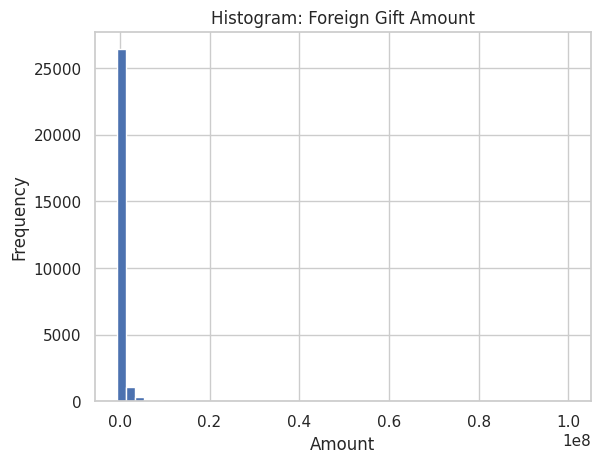

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


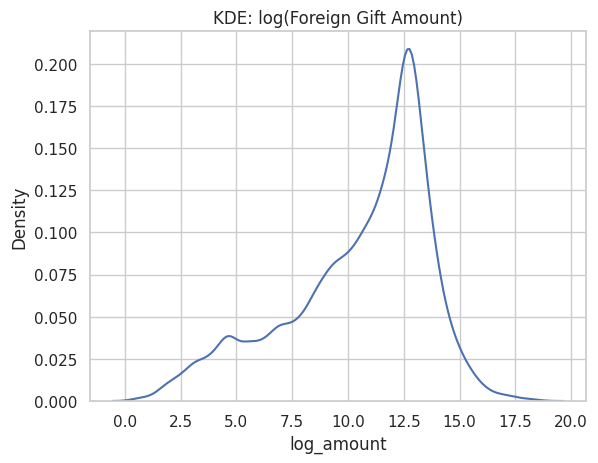

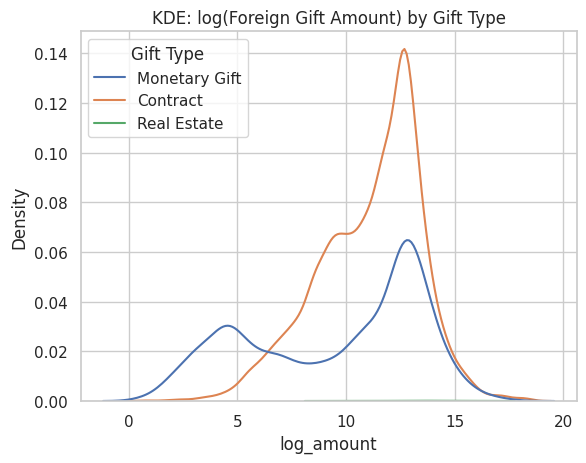

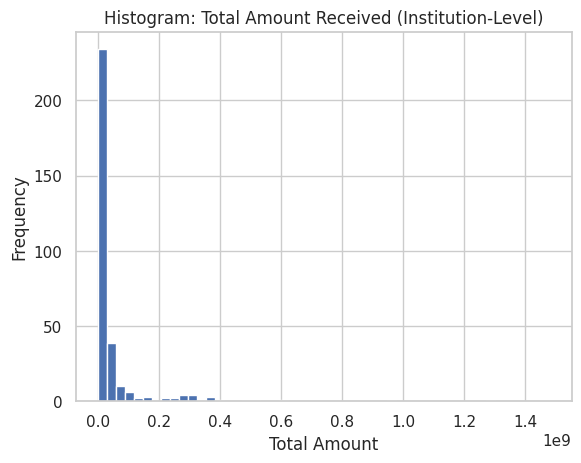

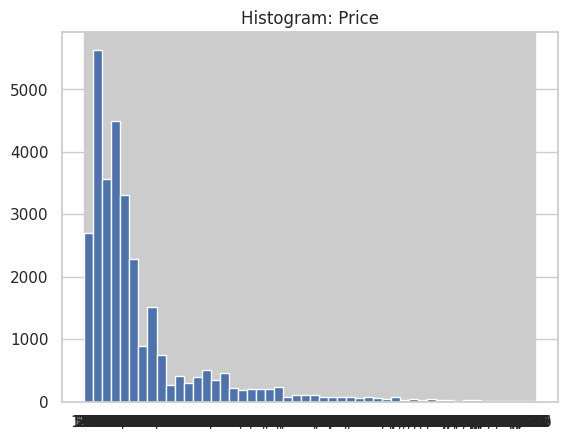

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

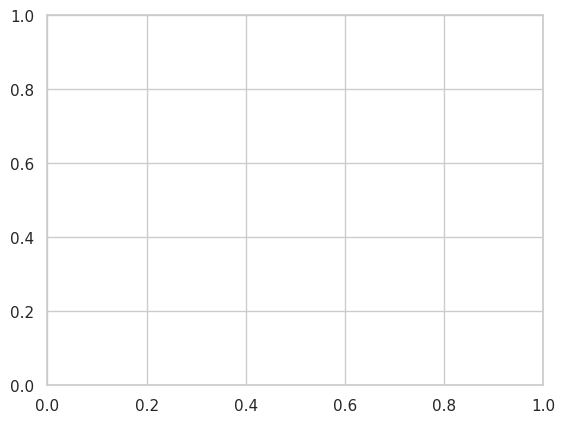

In [13]:
############################################################
# Assignment: Exploratory Data Analysis (Full, Corrected)
############################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

############################################################
# Q1. Sample statistics identities and transformations
############################################################

x = np.random.randn(1000)
y = np.random.randn(1000)

# Mean identity
mean_centered = np.mean(x - np.mean(x))

# Variance identity
var_identity = np.mean(x**2) - (np.mean(x))**2
var_np = np.var(x, ddof=0)

# Covariance identity
cov_identity = np.mean(x*y) - np.mean(x)*np.mean(y)
cov_np = np.cov(x, y, ddof=0)[0, 1]

# Median monotone counterexample
data = np.array([1, 2, 100])
g = np.square  # non-decreasing on R+
median_of_transformed = np.median(g(data))
transformed_of_median = g(np.median(data))

############################################################
# Q2. Foreign Gifts Data
############################################################

fg = pd.read_csv("/ForeignGifts_edu.csv")

# Histogram of raw amounts
plt.figure()
fg["Foreign Gift Amount"].hist(bins=50)
plt.title("Histogram: Foreign Gift Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Gift Type proportions
gift_counts = fg["Gift Type"].value_counts(normalize=True)

# Log transform (add 1 to avoid log(0))
fg["log_amount"] = np.log(fg["Foreign Gift Amount"] + 1)

plt.figure()
sns.kdeplot(x=fg["log_amount"])
plt.title("KDE: log(Foreign Gift Amount)")
plt.show()

plt.figure()
sns.kdeplot(data=fg, x="log_amount", hue="Gift Type")
plt.title("KDE: log(Foreign Gift Amount) by Gift Type")
plt.show()

# Top countries by frequency
top15_count = (
    fg.groupby("Country of Giftor")["Foreign Gift Amount"]
      .count()
      .sort_values(ascending=False)
      .head(15)
)

# Top countries by total amount
top15_amount = (
    fg.groupby("Country of Giftor")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

# Top institutions by total amount
inst_amounts = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
)
top15_inst = inst_amounts.head(15)

plt.figure()
inst_amounts.hist(bins=50)
plt.title("Histogram: Total Amount Received (Institution-Level)")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

# Giftors contributing the most
top_giftors = (
    fg.groupby("Giftor Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

############################################################
# Q3. Airbnb Data
############################################################

air = pd.read_csv("/airbnb_hw.csv")

# Dimensions and first rows
air_shape = air.shape
air_head = air.head()

# Cross tabulation
cross_tab = pd.crosstab(air["Room Type"], air["Property Type"])

# Price distributions
plt.figure()
air["Price"].hist(bins=50)
plt.title("Histogram: Price")
plt.show()

plt.figure()
sns.kdeplot(x=air["Price"])
plt.title("KDE: Price")
plt.show()

plt.figure()
sns.boxplot(x=air["Price"])
plt.title("Boxplot: Price")
plt.show()

desc_price = air["Price"].describe()

# Log transform
air["price_log"] = np.log(air["Price"] + 1)

plt.figure()
air["price_log"].hist(bins=50)
plt.title("Histogram: log(Price)")
plt.show()

plt.figure()
sns.kdeplot(x=air["price_log"])
plt.title("KDE: log(Price)")
plt.show()

plt.figure()
sns.boxplot(x=air["price_log"])
plt.title("Boxplot: log(Price)")
plt.show()

desc_price_log = air["price_log"].describe()

# Scatter price_log vs beds
plt.figure()
sns.scatterplot(x="Beds", y="price_log", data=air, alpha=0.5)
plt.title("Scatter: price_log vs Beds")
plt.show()

# Group by beds
group_beds = air.groupby("Beds")["Price"].agg(["mean", "std", "median", "count"])

# Scatter colored by room & property type
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=air,
    x="Beds",
    y="price_log",
    hue="Room Type",
    style="Property Type",
    alpha=0.5
)
plt.title("Scatter: price_log vs Beds (by Room & Property)")
plt.show()

# Group by room and property type
group_room_prop = air.groupby(["Room Type", "Property Type"])["Price"].agg(
    ["mean", "std", "median", "count"]
)

# Jointplot
sns.jointplot(
    data=air,
    x="Beds",
    y="price_log",
    kind="hex"
)

############################################################
# Q4. Drilling Rigs Data
############################################################

dr = pd.read_csv("/drilling_rigs.csv")

# Inspect structure
dr_shape = dr.shape
dr_info = dr.dtypes

# Convert numeric columns
for col in dr.columns:
    if col != "Month":
        dr[col] = pd.to_numeric(dr[col], errors="coerce")

# Convert Month to datetime
dr["time"] = pd.to_datetime(dr["Month"], format="mixed")

# Line plot
plt.figure()
plt.plot(dr["time"], dr["Active Well Service Rig Count (Number of Rigs)"])
plt.title("Active Rig Count Over Time")
plt.xlabel("Time")
plt.ylabel("Rig Count")
plt.show()

# First difference
dr["rig_diff"] = dr["Active Well Service Rig Count (Number of Rigs)"].diff()

plt.figure()
plt.plot(dr["time"], dr["rig_diff"])
plt.title("First Difference of Rig Count")
plt.xlabel("Time")
plt.ylabel("Δ Rig Count")
plt.show()

# Melt onshore/offshore
melted = dr.melt(
    id_vars=["Month", "time"],
    value_vars=[
        "Onshore Rig Count (Number of Rigs)",
        "Offshore Rig Count (Number of Rigs)"
    ],
    var_name="Rig Type",
    value_name="Count"
)

plt.figure(figsize=(8,6))
sns.lineplot(data=melted, x="time", y="Count", hue="Rig Type")
plt.title("Onshore vs Offshore Rigs Over Time")
plt.show()
